In [71]:
import pandas as pd

df = pd.read_csv('data__antares-cse_cnt-iTXYCphp1AuE2WwH_noStartDate_noEndDate.csv')
df = df.drop(columns=['Data URI'])
df.head()


,Time,Content
0,2025-03-08T23:39:31.000Z,"{""devUI"":""08:D1:F9:35:B5:48"",""time_at_device"":..."
1,2025-03-08T23:39:42.000Z,"{""devUI"":""08:D1:F9:35:B5:48"",""time_at_device"":..."
2,2025-03-08T23:40:01.000Z,"{""devUI"":""08:D1:F9:35:B5:48"",""time_at_device"":..."
3,2025-03-08T23:40:12.000Z,"{""devUI"":""08:D1:F9:35:B5:48"",""time_at_device"":..."
4,2025-03-08T23:40:33.000Z,"{""devUI"":""08:D1:F9:35:B5:48"",""time_at_device"":..."


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43568 entries, 0 to 43567
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Time     43568 non-null  object
 1   Content  43568 non-null  object
dtypes: object(2)
memory usage: 680.9+ KB


In [73]:
import json

def clean_json(text):
    try:
        return json.loads(text.replace("\n", "").replace("\r", "").strip())  # Hapus karakter newline dan spasi ekstra
    except json.JSONDecodeError:
        return None  # Jika gagal, isi dengan None

df["Content"] = df["Content"].apply(clean_json)
df = df.dropna(subset=["Content"])

# Ekstrak data JSON menjadi kolom sendiri
df_json = df["Content"].apply(pd.Series)
df = pd.concat([df.drop(columns=["Content"]), df_json], axis=1)

df.head()


,Time,devUI,time_at_device,time_received_at_gateway,time_send_from_gateway,RSSI,protocol,voltage,current,power,energy,frequency,power_factor
0,2025-03-08T23:39:31.000Z,08:D1:F9:35:B5:48,2025-03-08 23:39:16,2025-03-08 23:39:31,2025-03-08 23:39:31,-110,mqtt,226.80,0.27,40.90,0.63,433000000.0,0.66
1,2025-03-08T23:39:42.000Z,08:D1:F9:35:B5:48,2025-03-08 23:39:26,2025-03-08 23:39:41,2025-03-08 23:39:41,-110,http,227.00,0.27,42.10,0.63,433000000.0,0.68
2,2025-03-08T23:40:01.000Z,08:D1:F9:35:B5:48,2025-03-08 23:39:36,2025-03-08 23:39:52,2025-03-08 23:39:52,-109,http,230.30,0.25,38.80,0.63,433000000.0,0.66
3,2025-03-08T23:40:12.000Z,08:D1:F9:35:B5:48,2025-03-08 23:39:57,2025-03-08 23:40:12,2025-03-08 23:40:12,-109,mqtt,229.00,0.26,39.10,0.63,433000000.0,0.66
4,2025-03-08T23:40:33.000Z,08:D1:F9:35:B5:48,2025-03-08 23:40:07,2025-03-08 23:40:23,2025-03-08 23:40:23,-109,mqtt,230.90,0.26,39.50,0.63,433000000.0,0.66


In [74]:
# Ubah kolom "Time" menjadi format datetime
df["Time"] = pd.to_datetime(df["Time"], errors="coerce")

# Tambahkan 1 detik ke semua baris
df["Time"] = df["Time"] + pd.Timedelta(seconds=1)

# Ubah kembali ke format string jika diperlukan
df["Time"] = df["Time"].dt.strftime("%Y-%m-%d %H:%M:%S")
df = df.rename(columns={"Time": "received_at_server"})

df.head()

,received_at_server,devUI,time_at_device,time_received_at_gateway,time_send_from_gateway,RSSI,protocol,voltage,current,power,energy,frequency,power_factor
0,2025-03-08 23:39:32,08:D1:F9:35:B5:48,2025-03-08 23:39:16,2025-03-08 23:39:31,2025-03-08 23:39:31,-110,mqtt,226.80,0.27,40.90,0.63,433000000.0,0.66
1,2025-03-08 23:39:43,08:D1:F9:35:B5:48,2025-03-08 23:39:26,2025-03-08 23:39:41,2025-03-08 23:39:41,-110,http,227.00,0.27,42.10,0.63,433000000.0,0.68
2,2025-03-08 23:40:02,08:D1:F9:35:B5:48,2025-03-08 23:39:36,2025-03-08 23:39:52,2025-03-08 23:39:52,-109,http,230.30,0.25,38.80,0.63,433000000.0,0.66
3,2025-03-08 23:40:13,08:D1:F9:35:B5:48,2025-03-08 23:39:57,2025-03-08 23:40:12,2025-03-08 23:40:12,-109,mqtt,229.00,0.26,39.10,0.63,433000000.0,0.66
4,2025-03-08 23:40:34,08:D1:F9:35:B5:48,2025-03-08 23:40:07,2025-03-08 23:40:23,2025-03-08 23:40:23,-109,mqtt,230.90,0.26,39.50,0.63,433000000.0,0.66


In [75]:
numeric_columns = ["voltage", "current", "power", "energy", "frequency", "power_factor"]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 43533 entries, 0 to 43567
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   received_at_server        43533 non-null  object 
 1   devUI                     43533 non-null  object 
 2   time_at_device            43533 non-null  object 
 3   time_received_at_gateway  43533 non-null  object 
 4   time_send_from_gateway    43533 non-null  object 
 5   RSSI                      43533 non-null  int64  
 6   protocol                  43533 non-null  object 
 7   voltage                   42985 non-null  float64
 8   current                   42956 non-null  float64
 9   power                     42976 non-null  float64
 10  energy                    42967 non-null  float64
 11  frequency                 43035 non-null  float64
 12  power_factor              42923 non-null  float64
dtypes: float64(6), int64(1), object(6)
memory usage: 4.6+ MB


In [76]:
numeric_columns = ["voltage", "current", "power", "energy", "frequency", "power_factor"]
df_nan = df[df[numeric_columns].isna().any(axis=1)]
print("mean of nan balue: ", df_nan["RSSI"].mean())
print("min RSSI of nan value: ",df_nan["RSSI"].max())

mean of nan balue:  -122.4888366627497
min RSSI of nan value:  -98


In [77]:
numeric_columns = ["voltage", "current", "power", "energy", "frequency", "power_factor"]
df_non_nan = df[df[numeric_columns].notna().any(axis=1)]
df_non_nan = df.dropna(subset=numeric_columns)

df_non_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42682 entries, 0 to 43567
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   received_at_server        42682 non-null  object 
 1   devUI                     42682 non-null  object 
 2   time_at_device            42682 non-null  object 
 3   time_received_at_gateway  42682 non-null  object 
 4   time_send_from_gateway    42682 non-null  object 
 5   RSSI                      42682 non-null  int64  
 6   protocol                  42682 non-null  object 
 7   voltage                   42682 non-null  float64
 8   current                   42682 non-null  float64
 9   power                     42682 non-null  float64
 10  energy                    42682 non-null  float64
 11  frequency                 42682 non-null  float64
 12  power_factor              42682 non-null  float64
dtypes: float64(6), int64(1), object(6)
memory usage: 4.6+ MB


In [78]:
print(df_non_nan["RSSI"].mean())

-114.40483107633194


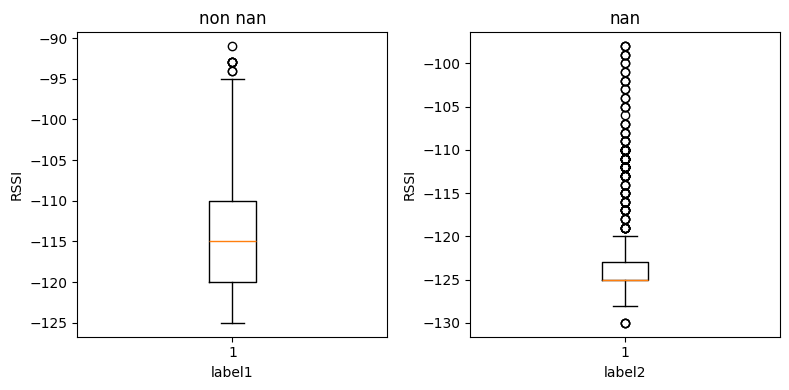

In [79]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_two_boxplots(df1, df2, column="RSSI", title1="DataFrame 1", title2="DataFrame 2", label1="label1", label2="label2"):

    # Membuat figure dan axes
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    # Boxplot untuk kolom "RSSI" di DataFrame pertama
    axes[0].boxplot(df1[column])
    axes[0].set_title(title1)
    axes[0].set_ylabel(column)
    axes[0].set_xlabel(label1)

    # Boxplot untuk kolom "RSSI" di DataFrame kedua
    axes[1].boxplot(df2[column])
    axes[1].set_title(title2)
    axes[1].set_ylabel(column)
    axes[1].set_xlabel(label2)

    # Menampilkan plot
    plt.tight_layout()
    plt.show()

plot_two_boxplots(df_non_nan, df_nan, column="RSSI", title1="non nan", title2="nan")

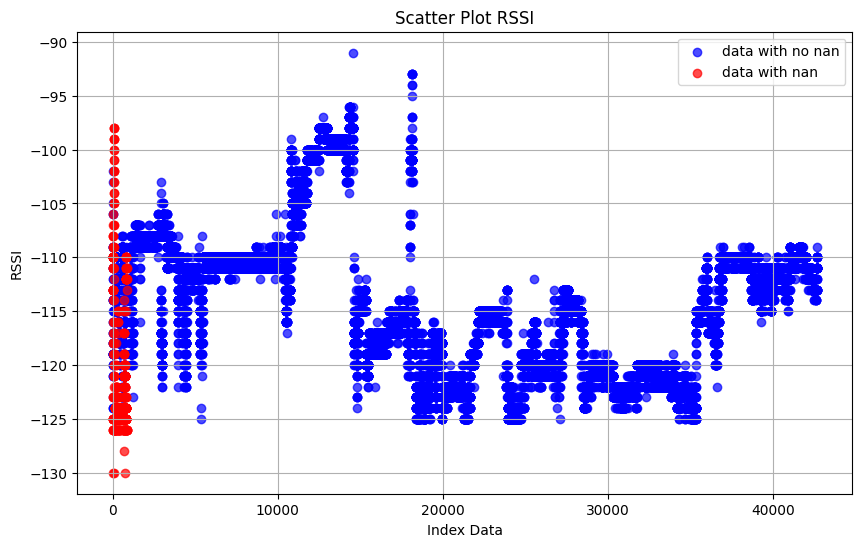

In [80]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_two_scatter(df1, df2, column="RSSI", title="Scatter Plot", label1="data 1", label2="data 2"):

    plt.figure(figsize=(10, 6))

    # Scatter plot untuk DataFrame pertama
    plt.scatter(range(len(df1)), df1[column], label=label1, color='blue', alpha=0.7)

    # Scatter plot untuk DataFrame kedua
    plt.scatter(range(len(df2)), df2[column], label=label2, color='red', alpha=0.7)

    # Menambahkan judul dan label
    plt.title(title)
    plt.xlabel('Index Data')
    plt.ylabel(column)
    plt.legend()

    # Menampilkan plot
    plt.grid(True)
    plt.show()

plot_two_scatter(df_non_nan, df_nan, column="RSSI", title="Scatter Plot RSSI", label1="data with no nan", label2="data with nan")

In [81]:

df["time_at_device"] = df["time_at_device"].str.replace(r"[^\x00-\x7F]+", "", regex=True)  # Hapus karakter non-ASCII

# Konversi ke format datetime dengan error handling
df["time_at_device"] = pd.to_datetime(df["time_at_device"], format="%Y-%m-%d %H:%M:%S", errors="coerce")

# Hapus baris yang masih bermasalah (NaT/null)
df = df.dropna(subset=["time_at_device"])


df['time_send_from_gateway'] = df['time_send_from_gateway'].str.split('.').str[0]
df['time_send_from_gateway'] = pd.to_datetime(df['time_send_from_gateway'])
df['received_at_server'] = pd.to_datetime(df['received_at_server'])
df['time_received_at_gateway'] = pd.to_datetime(df['time_received_at_gateway'])

df['latency_to_server(s)'] = (df['received_at_server'] - df['time_send_from_gateway']).dt.total_seconds()
df['latency_in_lora(s)'] = (df['time_received_at_gateway'] - df['time_at_device']).dt.total_seconds()

df.head()

,received_at_server,devUI,time_at_device,time_received_at_gateway,time_send_from_gateway,RSSI,protocol,voltage,current,power,energy,frequency,power_factor,latency_to_server(s),latency_in_lora(s)
0,2025-03-08 23:39:32,08:D1:F9:35:B5:48,2025-03-08 23:39:16,2025-03-08 23:39:31,2025-03-08 23:39:31,-110,mqtt,226.8,0.27,40.9,0.63,433000000.0,0.66,1.0,15.0
1,2025-03-08 23:39:43,08:D1:F9:35:B5:48,2025-03-08 23:39:26,2025-03-08 23:39:41,2025-03-08 23:39:41,-110,http,227.0,0.27,42.1,0.63,433000000.0,0.68,2.0,15.0
2,2025-03-08 23:40:02,08:D1:F9:35:B5:48,2025-03-08 23:39:36,2025-03-08 23:39:52,2025-03-08 23:39:52,-109,http,230.3,0.25,38.8,0.63,433000000.0,0.66,10.0,16.0
3,2025-03-08 23:40:13,08:D1:F9:35:B5:48,2025-03-08 23:39:57,2025-03-08 23:40:12,2025-03-08 23:40:12,-109,mqtt,229.0,0.26,39.1,0.63,433000000.0,0.66,1.0,15.0
4,2025-03-08 23:40:34,08:D1:F9:35:B5:48,2025-03-08 23:40:07,2025-03-08 23:40:23,2025-03-08 23:40:23,-109,mqtt,230.9,0.26,39.5,0.63,433000000.0,0.66,11.0,16.0


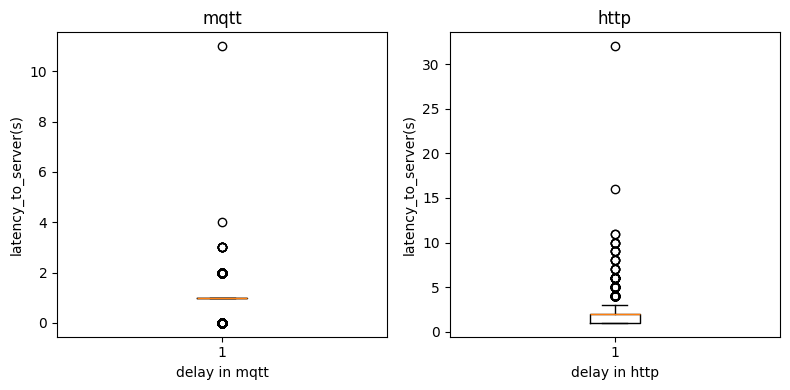

In [88]:
df = df[df["received_at_server"] >= "2025-03-12"]

df_mqtt = df[df['protocol'] == 'mqtt']
df_http = df[df['protocol'] == 'http']

plot_two_boxplots(df1=df_mqtt, df2=df_http, column="latency_to_server(s)", title1="mqtt", title2="http", label1="delay in mqtt", label2="delay in http")

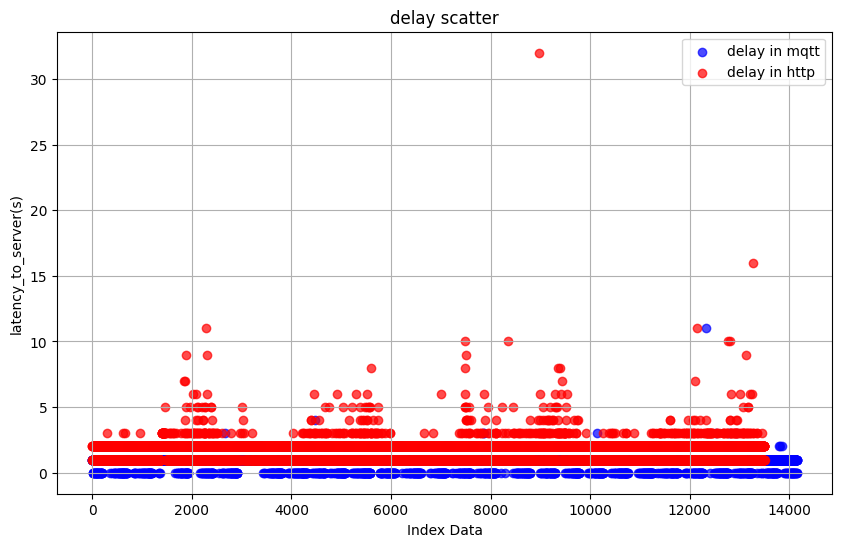

mean delay in mqtt:  0.9337809187279152
mean delay in http:  1.7068582432232262


In [89]:
plot_two_scatter(df1=df_mqtt, df2=df_http, column="latency_to_server(s)", title="delay scatter", label1="delay in mqtt", label2="delay in http")
print("mean delay in mqtt: ", df_mqtt['latency_to_server(s)'].mean())
print("mean delay in http: ", df_http['latency_to_server(s)'].mean())